<a href="https://colab.research.google.com/github/davidnalbandyann/ACA_homework/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

In [1]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X, y = load_iris(return_X_y=True)

In [2]:
import pandas as pd
pd.DataFrame(X).head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
pd.DataFrame(X).describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [6]:
X_train.shape

(112, 4)

In [7]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, max_iter=10000, )
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=0)

In [8]:
y_pred = classifier.predict(X_test)

In [9]:
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [10]:
probs_y = classifier.predict_proba(X_test)

In [11]:
round(1.555197, 2)

1.56

In [12]:
for x in probs_y[:10]:
    print([round(y,2) for y in x])

[0.0, 0.06, 0.94]
[0.01, 0.96, 0.03]
[0.98, 0.02, 0.0]
[0.0, 0.02, 0.98]
[0.97, 0.03, 0.0]
[0.0, 0.01, 0.99]
[0.98, 0.02, 0.0]
[0.0, 0.75, 0.25]
[0.0, 0.74, 0.26]
[0.02, 0.94, 0.04]


In [13]:
import numpy as np
probs_y = np.round(probs_y, 2)
res = "{:<10} | {:<10} | {:<10} | {:<13} | {:<5}".format("y_test",
                                                         "y_pred",
                                                         "Setosa(%)",
                                                         "versicolor(%)",
                                                         "virginica(%)\n")
res += "-"*65+"\n"
res += "\n".join("{:<10} | {:<10} | {:<10} | {:<13} | {:<10}".format(x, y, a, b, c)
                 for x, y, a, b, c in zip(y_test, y_pred, probs_y[:,0], probs_y[:,1], probs_y[:,2]))
res += "\n"+"-"*65+"\n"
print(res)

y_test     | y_pred     | Setosa(%)  | versicolor(%) | virginica(%)
-----------------------------------------------------------------
2          | 2          | 0.0        | 0.06          | 0.94      
1          | 1          | 0.01       | 0.96          | 0.03      
0          | 0          | 0.98       | 0.02          | 0.0       
2          | 2          | 0.0        | 0.02          | 0.98      
0          | 0          | 0.97       | 0.03          | 0.0       
2          | 2          | 0.0        | 0.01          | 0.99      
0          | 0          | 0.98       | 0.02          | 0.0       
1          | 1          | 0.0        | 0.75          | 0.25      
1          | 1          | 0.0        | 0.74          | 0.26      
1          | 1          | 0.02       | 0.94          | 0.04      
2          | 2          | 0.0        | 0.16          | 0.84      
1          | 1          | 0.01       | 0.81          | 0.18      
1          | 1          | 0.0        | 0.79          | 0.2       
1       

In [14]:
classifier.score(X_test, y_test)

0.9736842105263158

# Confusion Matrix

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [16]:
df_cm = confusion_matrix(y_test, y_pred, normalize="true")
df_cm

array([[1.    , 0.    , 0.    ],
       [0.    , 0.9375, 0.0625],
       [0.    , 0.    , 1.    ]])

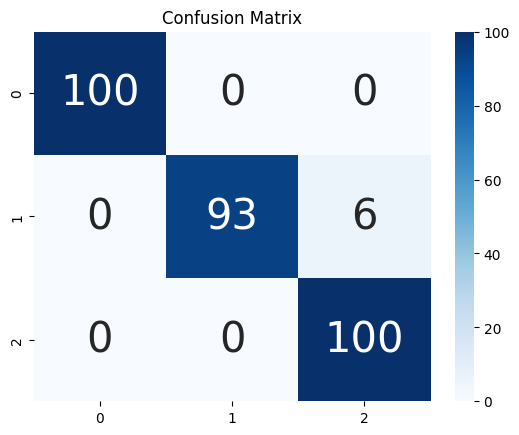

In [17]:
# Plot confusion matrix
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
# confusion matrix sns heatmap
ax = plt.axes()
df_cm = (confusion_matrix(y_test, y_pred, normalize="true")*100).astype(int)

sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()


## Implement gradient descent on logistic regression

In [18]:
# # example of updating one weight
# epochs = 50
# lr = 0.1
# for _ in range(epochs):
#     w1 -= lr * x1 * (y_hat - y) # y_hat is predicted value

#### Remember that the derivative of loss function has the following formula
<img src="Loss.png">

In [19]:
import numpy as np

In [20]:
class BinaryLogisticRegression:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        '''
        Initializes the LogisticRegression class with learning rate and number of iterations

        Parameters:
            learning_rate (float): Learning rate of the model
            n_iters (int): Number of iterations for which gradient descent will run
        '''
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None

    def fit(self, X, y):
        '''
        Fits the logistic regression model to the training data

        Parameters:
            X (numpy array): Training data
            y (numpy array): Target variable for the training data
        '''

        # Initialize the weights to zeros
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        self.weights = np.zeros((X.shape[1], 1))

        # Gradient descent
        for i in range(self.n_iters):
            y_pred = self.sigmoid(X.dot(self.weights))

            # Fill in the code to calculate the gradients
            dw = (X.T.dot(y_pred-y))/len(y)

            # Fill in the code to update the weights and bias
            self.weights -= self.learning_rate*dw

    def predict(self, X):
        '''
        Predicts the class labels for the input data

        Parameters:
            X (numpy array): Input data for which class labels are to be predicted

        Returns:
            numpy array: Predicted class labels for the input data
        '''
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        return self.sigmoid(X.dot(self.weights))>0.5

    def sigmoid(self, z):
        '''
        Calculates the sigmoid function of the input

        Parameters:
            z (numpy array): Input to the sigmoid function

        Returns:
            numpy array: Output of the sigmoid function
        '''
        return 1 / (1+np.exp(-z))

    def score(self, x, y):
        y_pred = self.predict(x)
        return (y_pred == y).sum() / len(y)

In [23]:
from google.colab import files
uploaded = files.upload()

Saving classification.csv to classification.csv


In [24]:
import pandas as pd
df = pd.read_csv('classification.csv')

In [25]:
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,college degree,17,12,176,9.3,11.359392,5.008608,1
1,27,no high school,10,6,31,17.3,1.362202,4.000798,0
2,40,no high school,15,14,55,5.5,0.856075,2.168925,0
3,41,no high school,15,14,120,2.9,2.658720,0.821280,0
4,24,high school,2,0,28,17.3,1.787436,3.056564,1


In [26]:
X = df.drop(['ed', 'default'], axis=1).values
y = df['default'].values

In [27]:
y = y.reshape(-1,1)

In [28]:
blr = BinaryLogisticRegression()
blr.fit(X, y)

In [29]:
blr.score(X, y)

0.7785714285714286

# Questions

1. How does logistic regression handle categorical variables?
2. Can logistic regression be used for classification problems with more than two classes?
3. Is there a way to do regularization in Logistic Regression?
4. How can you deal with imbalanced data in logistic regression?

## Answers

### 1. We can use one hot encoding.

### 2. Yes We can do it by using Softwax. Its e^(B0 + B1X1 + B2X2 + ...)/(sum(e^(B0i + B1iX1i + B2iX2i + ...) fo i in range (0, n), where n is the number of datapoints)

### 3. Yes we can regularize Logistic Regression by using L1 or L2 regularizations.

### 4. Instead of reducing the class which has more datapoints then the other one, we can do data augmentation to the less one.

# Homework

# 1. Solve classification problem using 'classification.csv' dataset

In [30]:
import pandas as pd
df = pd.read_csv('classification.csv')
df.head(10)

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,college degree,17,12,176,9.3,11.359392,5.008608,1
1,27,no high school,10,6,31,17.3,1.362202,4.000798,0
2,40,no high school,15,14,55,5.5,0.856075,2.168925,0
3,41,no high school,15,14,120,2.9,2.658720,0.821280,0
4,24,high school,2,0,28,17.3,1.787436,3.056564,1
5,41,high school,5,5,25,10.2,0.392700,2.157300,0
6,39,no high school,20,9,67,30.6,3.833874,16.668126,0
7,43,no high school,12,11,38,3.6,0.128592,1.239408,0
8,24,no high school,3,4,19,24.4,1.358348,3.277652,1
9,36,no high school,0,13,25,19.7,2.777700,2.147300,0


#### visualise the data, do some EDA

1. Age is numerical.
2. Ed is ordinal.
3. Employ is rational.
4. Address is nominal.
5. Incoome is rational.
6. Debtinc is rational.
7. Creddebt is rational.
8. Othdebt is raional.

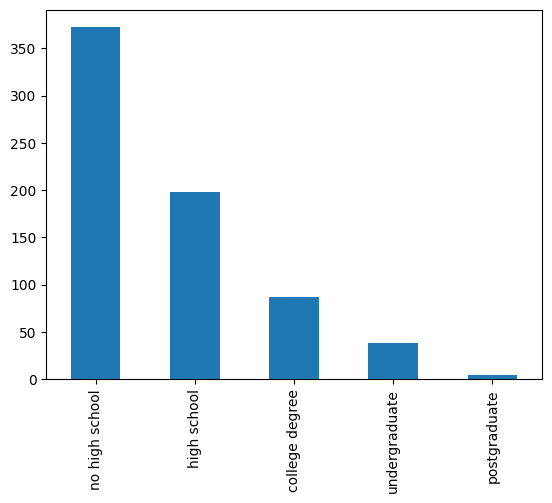

In [31]:
df['ed'].value_counts().plot(kind='bar')
plt.show()

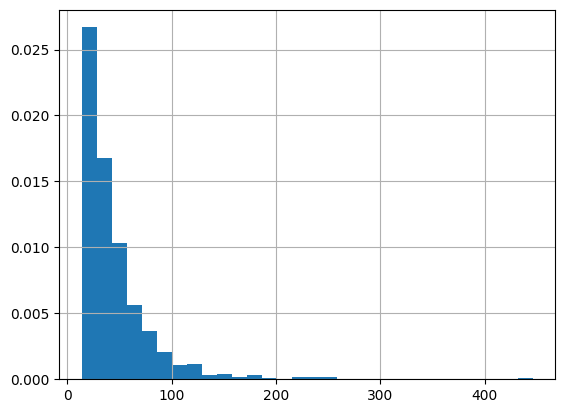

In [32]:
df['income'].hist(bins = 30, density = True);

##### target variable is 'default'. Apply feature selection, feature scaling, cross validation etc. (anything you think is needed)

In [33]:
y = df['default']
X = df.loc[:, df.columns != 'default']

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [36]:
ohe = OneHotEncoder()

In [37]:
cat_columns = X_train.select_dtypes(include='object').columns
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
ohe.fit(X_train[cat_columns])
X_train[ohe.get_feature_names_out()] = ohe.transform(X_train[cat_columns])
X_test[ohe.get_feature_names_out()] = ohe.transform(X_test[cat_columns])
X_train.drop(cat_columns, axis=1, inplace=True)
X_test.drop(cat_columns, axis=1, inplace=True)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [38]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# 2. Print accuracy, confusion matrix, precision and recall on train and test (and maybe validation) datasets.

In [39]:
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

In [40]:
print(accuracy_train, accuracy_test)

0.8375 0.7571428571428571


In [41]:
from sklearn.metrics import confusion_matrix

# # Assume y_true and y_pred are arrays of true and predicted labels, respectively
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)
print(cm_train)
print(cm_test)


[[393  25]
 [ 66  76]]
[[89 10]
 [24 17]]


##### do not use any libraries for metrics, implement yourself

In [42]:
print(type(y_test))
print(type(y_pred))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [43]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [44]:
from array import array

y_train = array('q', y_train)
y_test = array('q', y_test)
print(type(y_test))
print(y_test)

<class 'array.array'>
array('q', [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0])


### Train

In [45]:
TN = 0
FP = 0
FN = 0
TP = 0
for i in range(len(y_train)):
    if y_train[i] == y_pred_train[i] == 0:
        TN += 1
    if y_train[i] == 0 and y_pred_train[i] == 1:
        FP += 1
    if y_train[i] == 1 and y_pred_train[i] == 0:
        FN += 1
    if y_train[i] == y_pred_train[i] == 1:
        TP += 1
# print(TN)
# print(FP)
# print(FN)
# print(TP)
matrix_train = np.array([[TN, FP], [FN, TP]])
print(matrix_train)

[[393  25]
 [ 66  76]]


In [46]:
accuracy_train = (TP + TN)/(len(y_train))
print(accuracy_train)

0.8375


In [47]:
recall_train = TP/(TP + FN)
print(recall_train)

0.5352112676056338


In [48]:
precision_train = TP/(TP+FP)
print(precision_train)

0.7524752475247525


In [49]:
F1_train = 2/(1/precision_train + 1/recall_train)
print(F1_train)

0.625514403292181


### Test

In [50]:
TN = 0
FP = 0
FN = 0
TP = 0
for i in range(len(y_test)):
    if y_test[i] == y_pred_test[i] == 0:
        TN += 1
    if y_test[i] == 0 and y_pred_test[i] == 1:
        FP += 1
    if y_test[i] == 1 and y_pred_test[i] == 0:
        FN += 1
    if y_test[i] == y_pred_test[i] == 1:
        TP += 1
# print(TN)
# print(FP)
# print(FN)
# print(TP)
matrix_test = np.array([[TN, FP], [FN, TP]])
print(matrix_test)

[[89 10]
 [24 17]]


In [51]:
accuracy_test = (TP + TN)/(len(y_test))
print(accuracy_test)

0.7571428571428571


In [52]:
precision_test = TP/(TP+FP)
print(precision_test)

0.6296296296296297


In [53]:
recall_test = TP/(TP + FN)
print(recall_test)

0.4146341463414634


In [54]:
F1_test = 2/(1/precision_test + 1/recall_test)
print(F1_test)

0.5
